Prava di manipolazione dei risulati dello studio "Riproducibilità dell'immagine del buco nero M87", il codice al momento non è funzionante , poichè non si puo scaricare la libreria ethim , necessaria, in ambiente windows-like. La possibile soluzione o di creare una macchina virtuale Linux-like , scaricare jupyter creare un env condiviso nel host ma troppo lungo da attuare, oppure usare Windows Subsystem Linux. Alternativa molto pratica , mi è stata data da un membro del prgetto della Caltech , utilizzando un altra libreria. Vedi Ehtim-tutorial-M87. 

In [1]:
import os
print(os.getcwd())
# 😊

C:\Users\andre\Desktop\PIANETI_STELLE\M87


In [2]:
import pandas as pd

# Sostituisci 'nome_del_file.csv' con il percorso del tuo file CSV
file_path = './EHTC_FirstM87Results_Apr2019_CSV/csv/SR1_M87_2017_095_hi_hops_netcal_StokesI.csv'

# Carica il file CSV in un DataFrame di pandas
df = pd.read_csv(file_path)

# Visualizza le prime righe per verificare se il file è stato caricato correttamente
df.head()

#SRC:M87  \
#time(UTC)  T1 T2 U(lambda)        V(lambda)           Iamp(Jy)   
00.76805556 AA LM 1081709696.0000  -3833722368.0000  0.01429205   
               PV -4399932928.0000 -4509480448.0000  0.13673432   
               AP 834908.8125      -1722271.0000     1.11977953   
            AP LM 1080840064.0000  -3832004096.0000  0.01844797   

                                                    DATE(MJD):57848  \
#time(UTC)  T1 T2 U(lambda)        V(lambda)              Iphase(d)   
00.76805556 AA LM 1081709696.0000  -3833722368.0000       -118.9454   
               PV -4399932928.0000 -4509480448.0000          5.8638   
               AP 834908.8125      -1722271.0000            58.1095   
            AP LM 1080840064.0000  -3832004096.0000       -137.6802   

                                                    FREQ:229.0707GHz  
#time(UTC)  T1 T2 U(lambda)        V(lambda)              Isigma(Jy)  
00.76805556 AA LM 1081709696.0000  -3833722368.0000       0.00584681  
               PV -4399932928.0000 -4509480448.0000       0.00496755  
               AP 834908.8125      -1722271.0000          0.00524299  
            AP LM 1080840064.0000  -3832004096.0000       0.04457572

In [3]:
print(df.info())  # Mostra informazioni sul DataFrame, incluso il tipo di dati
print(df.head())  # Visualizza le prime righe

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6459 entries, ('#time(UTC)', 'T1', 'T2', 'U(lambda)', 'V(lambda)') to ('08.16527796', 'LM', 'SM', '4470521856.0000', '-32856334.0000')
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #SRC:M87          6459 non-null   object
 1   DATE(MJD):57848   6459 non-null   object
 2   FREQ:229.0707GHz  6459 non-null   object
dtypes: object(3)
memory usage: 841.1+ KB
None
                                                       #SRC:M87  \
#time(UTC)  T1 T2 U(lambda)        V(lambda)           Iamp(Jy)   
00.76805556 AA LM 1081709696.0000  -3833722368.0000  0.01429205   
               PV -4399932928.0000 -4509480448.0000  0.13673432   
               AP 834908.8125      -1722271.0000     1.11977953   
            AP LM 1080840064.0000  -3832004096.0000  0.01844797   

                                                    DATE(MJD):57848  \
#time(UTC)  T1 T2 U(lambda)     

In [ ]:
# Converti una colonna specifica in numerico
df['FREQ:229.0707GHz'] = pd.to_numeric(df['FREQ:229.0707GHz'], errors='coerce')

# Rimuovi righe non numeriche
df = df.dropna(subset=['FREQ:229.0707GHz'])

In [ ]:
df.info()
image_data = df.values
print(image_data.shape)

In [ ]:
# Trasforma in una matrice (esempio con 80x80)
try:
    image_data = df['FREQ:229.0707GHz'].values.reshape((80, 80))
except ValueError as e:
    print(f"Errore nel reshaping: {e}. Controlla che i dati siano della giusta lunghezza.")

# Visualizza come immagine
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

In [5]:
df= df['FREQ:229.0707GHz']

In [6]:
df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 6459 entries, ('#time(UTC)', 'T1', 'T2', 'U(lambda)', 'V(lambda)') to ('08.16527796', 'LM', 'SM', '4470521856.0000', '-32856334.0000')
Series name: FREQ:229.0707GHz
Non-Null Count  Dtype 
--------------  ----- 
6459 non-null   object
dtypes: object(1)
memory usage: 740.2+ KB


In [7]:
df.head()

#time(UTC)   T1  T2  U(lambda)         V(lambda)           Isigma(Jy)
00.76805556  AA  LM  1081709696.0000   -3833722368.0000    0.00584681
                 PV  -4399932928.0000  -4509480448.0000    0.00496755
                 AP  834908.8125       -1722271.0000       0.00524299
             AP  LM  1080840064.0000   -3832004096.0000    0.04457572
Name: FREQ:229.0707GHz, dtype: object

In [32]:
df['#time(UTC)'].info()

<class 'pandas.core.series.Series'>
MultiIndex: 1 entries, ('T1', 'T2', 'U(lambda)', 'V(lambda)') to ('T1', 'T2', 'U(lambda)', 'V(lambda)')
Series name: FREQ:229.0707GHz
Non-Null Count  Dtype 
--------------  ----- 
1 non-null      object
dtypes: object(1)
memory usage: 617.6+ KB


In [36]:
df['#time(UTC)']

T1  T2  U(lambda)  V(lambda)    Isigma(Jy)
Name: FREQ:229.0707GHz, dtype: object

In [50]:
print(df.index)

MultiIndex([( '#time(UTC)', 'T1', 'T2',        'U(lambda)', ...),
            ('00.76805556', 'AA', 'LM',  '1081709696.0000', ...),
            ('00.76805556', 'AA', 'PV', '-4399932928.0000', ...),
            ('00.76805556', 'AA', 'AP',      '834908.8125', ...),
            ('00.76805556', 'AP', 'LM',  '1080840064.0000', ...),
            ('00.76805556', 'AP', 'PV', '-4400756736.0000', ...),
            ('00.76805556', 'LM', 'PV', '-5481641472.0000', ...),
            ('00.77083334', 'AA', 'AP',      '834743.8750', ...),
            ('00.77083334', 'AA', 'LM',  '1083169792.0000', ...),
            ('00.77083334', 'AA', 'PV', '-4400603136.0000', ...),
            ...
            ('08.16527796', 'AP', 'LM',  '1526906368.0000', ...),
            ('08.16527796', 'AP', 'SM',  '5997417472.0000', ...),
            ('08.16527796', 'AP', 'JC',  '5997411328.0000', ...),
            ('08.16527796', 'AP', 'AZ',  '2605210624.0000', ...),
            ('08.16527796', 'AZ', 'SM',  '3392197120.0000', 

In [65]:
first_level = df.index.get_level_values(0)

In [68]:
first_level

Index(['#time(UTC)', '00.76805556', '00.76805556', '00.76805556',
       '00.76805556', '00.76805556', '00.76805556', '00.77083334',
       '00.77083334', '00.77083334',
       ...
       '08.16527796', '08.16527796', '08.16527796', '08.16527796',
       '08.16527796', '08.16527796', '08.16527796', '08.16527796',
       '08.16527796', '08.16527796'],
      dtype='object', length=6459)

In [69]:
second_level = df.index.get_level_values(1)
second_level

Index(['T1', 'AA', 'AA', 'AA', 'AP', 'AP', 'LM', 'AA', 'AA', 'AA',
       ...
       'AP', 'AP', 'AP', 'AP', 'AZ', 'AZ', 'AZ', 'JC', 'JC', 'LM'],
      dtype='object', length=6459)

In [70]:
terzo_level = df.index.get_level_values(2)
terzo_level 

Index(['T2', 'LM', 'PV', 'AP', 'LM', 'PV', 'PV', 'AP', 'LM', 'PV',
       ...
       'LM', 'SM', 'JC', 'AZ', 'SM', 'LM', 'JC', 'LM', 'SM', 'SM'],
      dtype='object', length=6459)

In [71]:
quarto_level = df.index.get_level_values(3)
quarto_level 

Index(['U(lambda)', '1081709696.0000', '-4399932928.0000', '834908.8125',
       '1080840064.0000', '-4400756736.0000', '-5481641472.0000',
       '834743.8750', '1083169792.0000', '-4400603136.0000',
       ...
       '1526906368.0000', '5997417472.0000', '5997411328.0000',
       '2605210624.0000', '3392197120.0000', '-1078323840.0000',
       '3392179968.0000', '-4470504448.0000', '17457.3457', '4470521856.0000'],
      dtype='object', length=6459)

In [72]:
quinto_level = df.index.get_level_values(4)
quinto_level 

Index(['V(lambda)', '-3833722368.0000', '-4509480448.0000', '-1722271.0000',
       '-3832004096.0000', '-4507746816.0000', '-675769152.0000',
       '-1722149.8750', '-3833557760.0000', '-4510170112.0000',
       ...
       '-3013817344.0000', '-3046676480.0000', '-3046564864.0000',
       '-4043408640.0000', '996739648.0000', '1029597312.0000',
       '996857920.0000', '32737106.0000', '-119228.2266', '-32856334.0000'],
      dtype='object', length=6459)

In [74]:
# Trasformare il livello estratto in un DataFrame
df_quinto_level = pd.DataFrame(quinto_level, columns=['V'])

In [75]:
# Trasformare il livello estratto in un DataFrame
df_quarto_level = pd.DataFrame(quarto_level, columns=['U'])

In [76]:
df= pd.concat([df_quinto_level, df_quarto_level], axis=1)
df

,V,U
0,V(lambda),U(lambda)
1,-3833722368.0000,1081709696.0000
2,-4509480448.0000,-4399932928.0000
3,-1722271.0000,834908.8125
4,-3832004096.0000,1080840064.0000
...,...,...
6454,1029597312.0000,-1078323840.0000
6455,996857920.0000,3392179968.0000
6456,32737106.0000,-4470504448.0000
6457,-119228.2266,17457.3457


In [79]:
print(df.iloc[0])

V    V(lambda)
U    U(lambda)
Name: 0, dtype: object


In [80]:
print(df.iloc[1])

V    -3833722368.0000
U     1081709696.0000
Name: 1, dtype: object


In [82]:
u = df["U"]
v = df["V"]

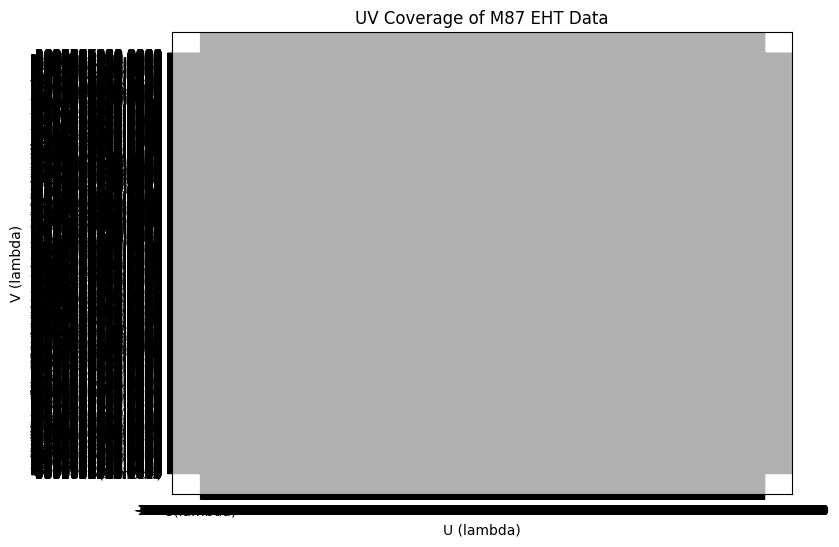

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot del piano UV
plt.figure(figsize=(8, 6))
plt.scatter(u, v, s=1, alpha=0.5)
plt.xlabel('U (lambda)')
plt.ylabel('V (lambda)')
plt.title('UV Coverage of M87 EHT Data')
plt.grid(True)
plt.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft2, fftshift
from sklearn.decomposition import TruncatedSVD
import pandas as pd



# Step 1: Creiamo una matrice UV che simula la distribuzione nel piano UV
X = df[['U', 'V']].values

# Step 2: Applichiamo la SVD (decomposizione in valori singolari)
svd = TruncatedSVD(n_components=2)  # Manteniamo due componenti principali
X_reduced = svd.fit_transform(X)

# Step 3: Ricostruzione dell'immagine dal piano UV

# Creiamo una matrice del piano UV (dimensioni 256x256 per esempio)
uv_size = 256
uv_grid = np.zeros((uv_size, uv_size))

# Mappiamo i dati ridotti nei pixel della matrice UV
for i in range(X_reduced.shape[0]):
    u_idx = int((X_reduced[i, 0] + 5) * (uv_size // 10))  # Map U a coordinate del piano
    v_idx = int((X_reduced[i, 1] + 5) * (uv_size // 10))  # Map V a coordinate del piano
    if u_idx < uv_size and v_idx < uv_size:
        uv_grid[u_idx, v_idx] = 1  # Assegniamo un valore (per esempio 1)

# Step 4: Applicare la Trasformata Inversa di Fourier (IFT) per ottenere l'immagine
# Nota: Stiamo assumendo che i dati siano sufficientemente campionati, in pratica i dati UV sono incompleti
image = np.abs(ifft2(fftshift(uv_grid)))

# Step 5: Visualizzare l'immagine
plt.imshow(image, cmap='gray')
plt.title('Immagine Ricostruita')
plt.colorbar()
plt.show()

ValueError: could not convert string to float: 'U(lambda)'